In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
#Always look for info and describe to see if we have ant missing data or not
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


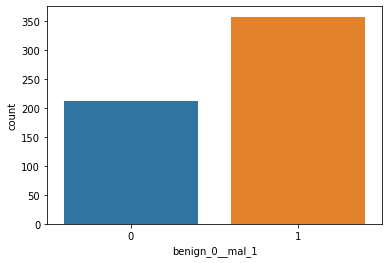

In [8]:
sns.countplot(df['benign_0__mal_1'])

In [15]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

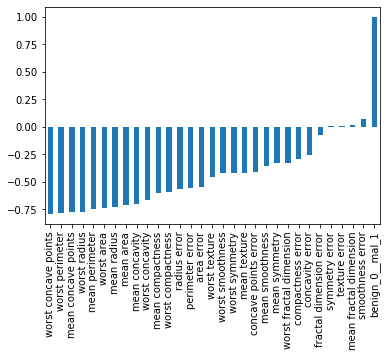

In [17]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [18]:
X = df.drop('benign_0__mal_1',axis = 1)# IF we set inplace True then we will loose this column
y = df['benign_0__mal_1']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_train.shape

(426, 30)

In [24]:
X_test = scaler.transform(X_test)

# After splitting and scaling we will build our model

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense,Dropout

In [31]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))

model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid')) #For binary output we use sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')


In [32]:
model.fit(x=X_train,y=y_train,epochs=600,verbose = 1 ,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6714 - val_loss: 0.6531
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6356 - val_loss: 0.6171
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6004 - val_loss: 0.5797
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5626 - val_loss: 0.5388
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5183 - val_loss: 0.4924
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4709 - val_loss: 0.4371
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4189 - val_loss: 0.3838
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3709 - val_loss: 0.3392
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3297 - val_loss: 0.2959
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2936 - val_loss: 0.2659
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1097
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.1123
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0501 - val_loss: 0.1183
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0503 - val_loss: 0.1129
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.1155
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0503 - val_loss: 0.1211
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0479 - val_loss: 0.1108
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0494 - val_loss: 0.1125
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.1122
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.1151
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.1251
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1473
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.1219
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.1437
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0371 - val_loss: 0.1305
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1291
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.1285
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.1315
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0339 - val_loss: 0.1289
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1283
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.1550
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.1469
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.1492
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.1466
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.1619
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1530
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.1499
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.1617
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.1590
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.1577
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.1774
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.1861
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.1755
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.1819
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.1905
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1701
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1908
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1783
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.1787
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.1894
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.2197
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.2620
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.1884
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0342 - val_loss: 0.3327
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.2045
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.2152
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0148 - val_loss: 0.2008
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2247
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.2062
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.2214
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.2319
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.2873
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.2467
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.2883
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.2716
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.2777
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.2541
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.2815
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.2550
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.3235
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.3708
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.3171
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.3303
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.3161
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.3267
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.3042
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.3523
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.2769
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.3219
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.3119
Epoc

In [34]:
model_loss = pd.DataFrame(model.history.history)

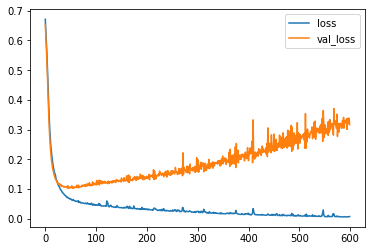

In [36]:
model_loss.plot()

In [37]:
#The graph above clearly shows that the validation loss goes on increasing 
#this shows that our model has overkill after a certain cycle


# Now we will add a early stop

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
# We need to re run the model every time so we don't keep on training on same model
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',patience=25,verbose = 1)
#we add patience to keep training even after we see overkill in this case for 25 more epochs

In [41]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose = 1,callbacks=[early_stop])
#always pass callbacks as a list even though it will be singular

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6722 - val_loss: 0.6461
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6326 - val_loss: 0.6099
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5967 - val_loss: 0.5736
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5590 - val_loss: 0.5334
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5188 - val_loss: 0.4880
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4715 - val_loss: 0.4400
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4256 - val_loss: 0.3905
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3793 - val_loss: 0.3443
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3371 - val_loss: 0.3070
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3024 - val_loss: 0.2722
Epoch 11/

In [43]:
model_loss1 = pd.DataFrame(model.history.history)

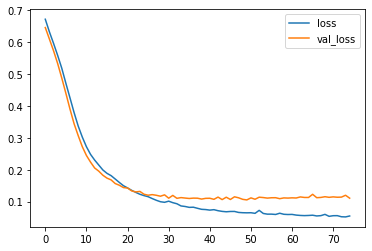

In [44]:
model_loss1.plot()

In [45]:
#By using callbacks and early stopping we improved the model and the validation loss is now closer to the loss

# Now we will further improve the model by adding in dropout layers

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) #This will randomly drop half of the nueral networs

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
#Everything else remains same we just add dropout

In [49]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7268 - val_loss: 0.6885
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6811 - val_loss: 0.6680
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6786 - val_loss: 0.6564
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6596 - val_loss: 0.6416
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6336 - val_loss: 0.6226
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6304 - val_loss: 0.6016
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6264 - val_loss: 0.5824
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5907 - val_loss: 0.5628
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5963 - val_loss: 0.5410
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5517 - val_loss: 0.5099
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.0753
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1286 - val_loss: 0.0740
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0998 - val_loss: 0.0798
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0975 - val_loss: 0.0810
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1019 - val_loss: 0.0741
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1262 - val_loss: 0.0873
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1055 - val_loss: 0.0723
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1153 - val_loss: 0.0733
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1128 - val_loss: 0.0711
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1102 - val_loss: 0.0858
Epoch 93/600


In [51]:
model_loss3 = pd.DataFrame(model.history.history)

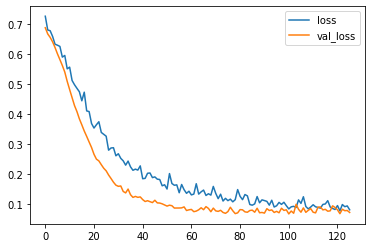

In [52]:
model_loss3.plot()

# Now we can clearly see that that the validation loss is even below the loss

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
final_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [55]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [57]:
print(confusion_matrix(y_test,final_pred))

[[54  1]
 [ 4 84]]
